In [1]:
import pandas as pd       # Data handling
import numpy as np        # Numerical computations
import seaborn as sns     # Visualization
import matplotlib.pyplot as plt  # Plotting


In [2]:
file_path = "tel data.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Display first few rows to understand structure
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Crop  Crop_Year       Season      State     Area  Production  \
0  Rice       2013  Kharif       Telangana  1166334     3768045   
1  Rice       2013  Rabi         Telangana   828103     2813045   
2  Rice       2014  Kharif       Telangana   920307     2854873   
3  Rice       2014  Rabi         Telangana   495113     1690109   
4  Rice       2015  Kharif       Telangana   748713     2197030   

   Annual_Rainfall    Fertilizer  Pesticide     Yield      pt    temp  
0           1348.7  1.685236e+08  314910.18  3.115556  986.75  25.030  
1           1348.7  1.196526e+08  223587.81  3.203333   37.94  23.292  
2            746.4  1.389295e+08  303701.31  2.958889  498.57  27.032  
3            746.4  7.474226e+07  163387.29  3.332222   76.72  23.118  
4            747.9  1.182293e+08  247075.29  2.822222  365.94  27.570  


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")



In [4]:
telangana_rice = df[(df["state"] == "Telangana") & (df["crop"] == "Rice")]

# Display updated column names
print("\nUpdated Column Names:", df.columns)



Updated Column Names: Index(['crop', 'crop_year', 'season', 'state', 'area', 'production',
       'annual_rainfall', 'fertilizer', 'pesticide', 'yield', 'pt', 'temp'],
      dtype='object')


In [5]:
# Check for duplicates
duplicate_count = telangana_rice.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Drop duplicates
telangana_rice = telangana_rice.drop_duplicates()

# Fill missing values
telangana_rice = telangana_rice.fillna(method='ffill')

# Verify missing values
print("\nMissing Values After Cleaning:\n", telangana_rice.isnull().sum())



Number of duplicate rows: 0

Missing Values After Cleaning:
 crop               0
crop_year          0
season             0
state              0
area               0
production         0
annual_rainfall    0
fertilizer         0
pesticide          0
yield              0
pt                 0
temp               0
dtype: int64


C:\Users\pinna\AppData\Local\Temp\ipykernel_21100\630723488.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  telangana_rice = telangana_rice.fillna(method='ffill')


In [6]:
print("\nStatistical Summary:\n", telangana_rice.describe())



Statistical Summary:
          crop_year          area    production  annual_rainfall    fertilizer  \
count    14.000000  1.400000e+01  1.400000e+01        14.000000  1.400000e+01   
mean   2016.000000  9.567843e+05  3.256472e+06       997.614286  1.515705e+08   
std       2.075498  3.634338e+05  1.413326e+06       251.272285  6.428407e+07   
min    2013.000000  2.974750e+05  8.502590e+05       746.400000  4.697428e+07   
25%    2014.250000  7.685605e+05  2.603682e+06       764.850000  1.198482e+08   
50%    2016.000000  9.178480e+05  2.987319e+06       942.600000  1.414327e+08   
75%    2017.750000  1.136497e+06  3.718645e+06      1269.450000  1.676021e+08   
max    2019.000000  1.631151e+06  5.985349e+06      1350.300000  2.801665e+08   

           pesticide      yield         pt       temp  
count      14.000000  14.000000   14.00000  14.000000  
mean   328760.815714   3.209884  350.77500  25.080857  
std    141102.570760   0.310732  361.64902   1.494513  
min     98166.750000   

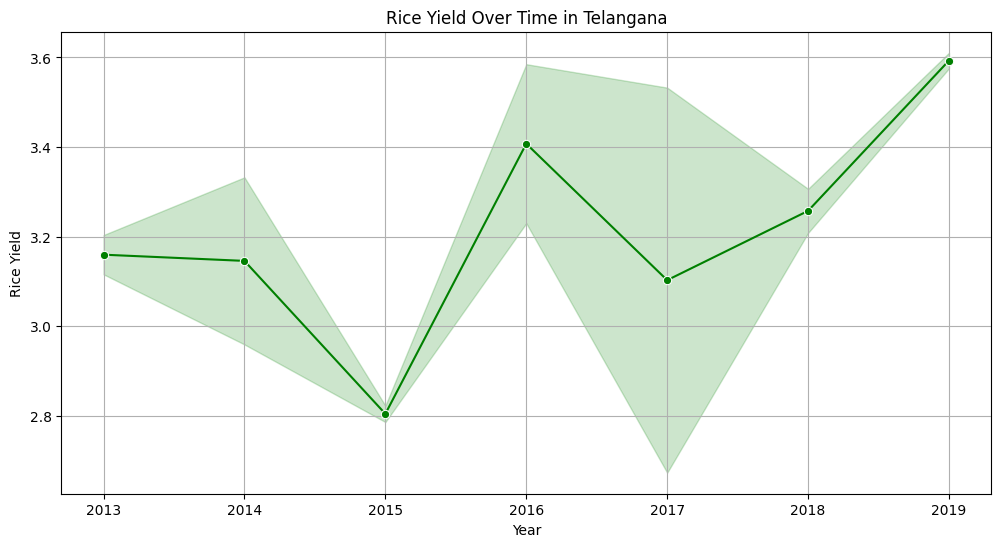

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='crop_year', y='yield', data=telangana_rice, marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Rice Yield")
plt.title("Rice Yield Over Time in Telangana")
plt.grid()
plt.show()


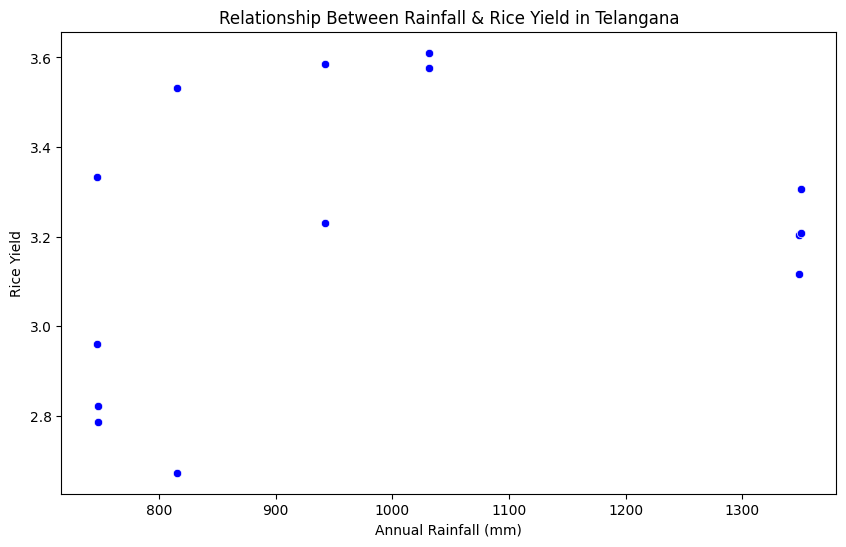

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_rainfall', y='yield', data=telangana_rice, color="blue")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Rice Yield")
plt.title("Relationship Between Rainfall & Rice Yield in Telangana")
plt.show()


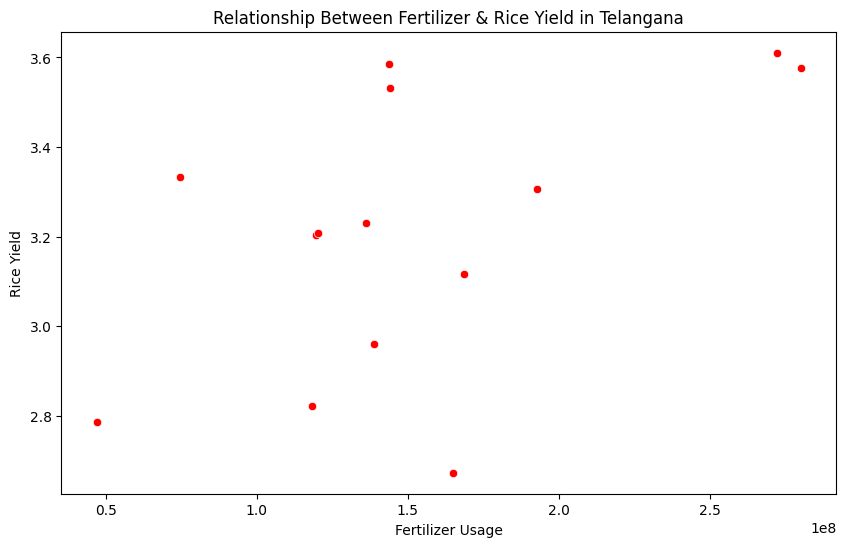

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fertilizer', y='yield', data=telangana_rice, color="red")
plt.xlabel("Fertilizer Usage")
plt.ylabel("Rice Yield")
plt.title("Relationship Between Fertilizer & Rice Yield in Telangana")
plt.show()


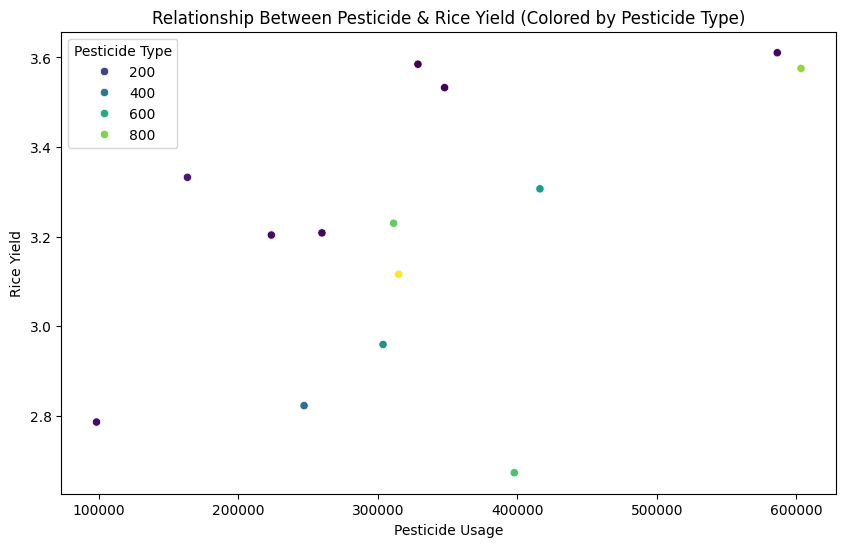

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pesticide', y='yield', hue='pt', data=telangana_rice, palette="viridis")
plt.xlabel("Pesticide Usage")
plt.ylabel("Rice Yield")
plt.title("Relationship Between Pesticide & Rice Yield (Colored by Pesticide Type)")
plt.legend(title="Pesticide Type")
plt.show()


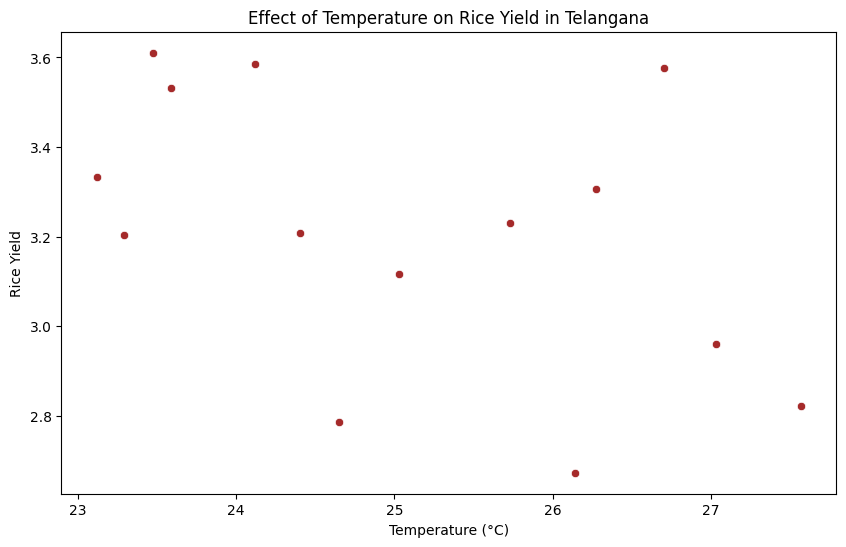

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='yield', data=telangana_rice, color="brown")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rice Yield")
plt.title("Effect of Temperature on Rice Yield in Telangana")
plt.show()


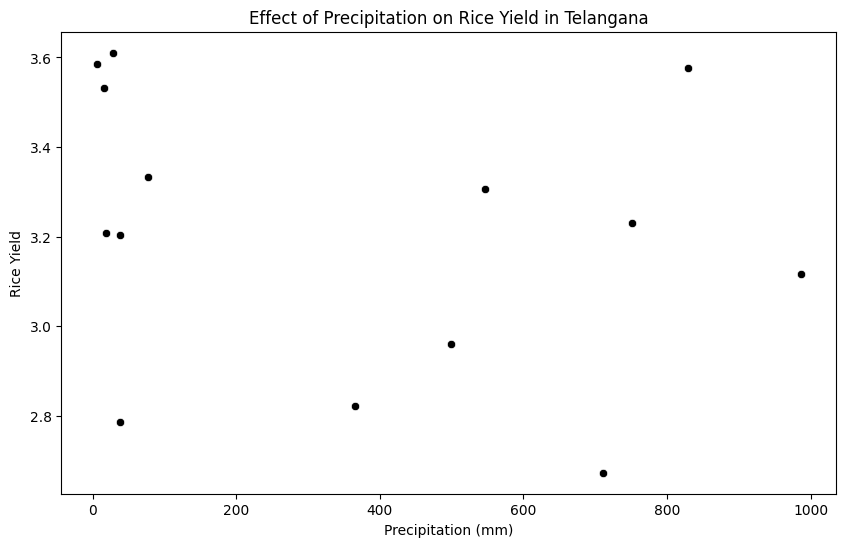

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pt', y='yield', data=telangana_rice, color="black")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Rice Yield")
plt.title("Effect of Precipitation on Rice Yield in Telangana")
plt.show()


In [13]:
correlation_matrix = telangana_rice[['yield', 'annual_rainfall', 'fertilizer', 'pt', 'temp']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
                     yield  annual_rainfall  fertilizer        pt      temp
yield            1.000000         0.272523    0.525398 -0.246376 -0.468908
annual_rainfall  0.272523         1.000000    0.304596  0.143428 -0.180203
fertilizer       0.525398         0.304596    1.000000  0.386729  0.201941
pt              -0.246376         0.143428    0.386729  1.000000  0.676491
temp            -0.468908        -0.180203    0.201941  0.676491  1.000000


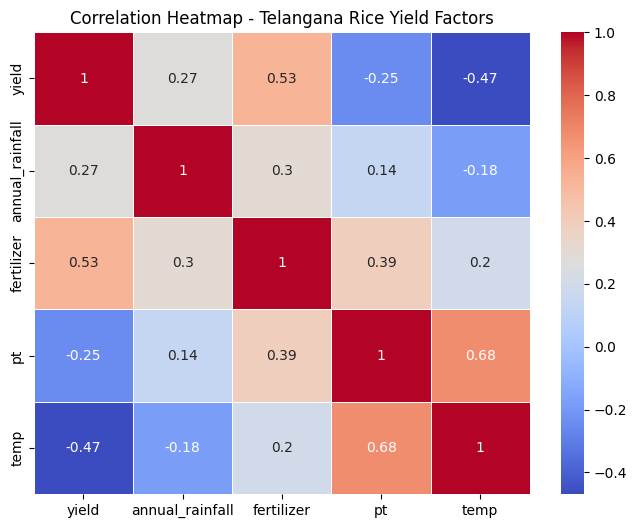

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap - Telangana Rice Yield Factors")
plt.show()


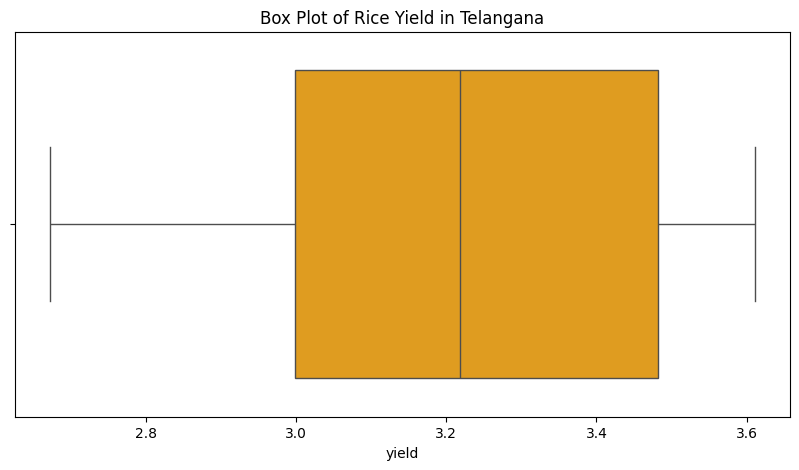

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=telangana_rice['yield'], color="orange")
plt.title("Box Plot of Rice Yield in Telangana")
plt.show()


In [16]:
telangana_rice['Fert_Temp'] = telangana_rice['fertilizer'] * telangana_rice['temp']
telangana_rice['Fert_Precip'] = telangana_rice['fertilizer'] * telangana_rice['pt']
telangana_rice['Temp_Precip'] = telangana_rice['temp'] * telangana_rice['pt']

# Squared terms
telangana_rice['Fert_Sq'] = telangana_rice['fertilizer'] ** 2
telangana_rice['Temp_Sq'] = telangana_rice['temp'] ** 2
telangana_rice['Precip_Sq'] = telangana_rice['pt'] ** 2


In [17]:
print(telangana_rice.dtypes)


crop                object
crop_year            int64
season              object
state               object
area                 int64
production           int64
annual_rainfall    float64
fertilizer         float64
pesticide          float64
yield              float64
pt                 float64
temp               float64
Fert_Temp          float64
Fert_Precip        float64
Temp_Precip        float64
Fert_Sq            float64
Temp_Sq            float64
Precip_Sq          float64
dtype: object


In [18]:
print(telangana_rice['yield'].unique())  # See unique values


[3.11555556 3.20333333 2.95888889 3.33222222 2.82222222 2.78555556
 3.22966667 3.585      2.67233333 3.53266667 3.3065625  3.208125
 3.575625   3.610625  ]


In [19]:
telangana_rice['yield'] = pd.to_numeric(telangana_rice['yield'], errors='coerce')


In [20]:
telangana_rice = telangana_rice.select_dtypes(include=[np.number])  # Keep only numeric columns


In [21]:
correlation_matrix = telangana_rice.corr()
print(correlation_matrix['yield'].sort_values(ascending=False))


yield              1.000000
production         0.654951
Fert_Sq            0.531749
fertilizer         0.525398
pesticide          0.523831
area               0.507922
Fert_Temp          0.451121
crop_year          0.434931
annual_rainfall    0.272523
Fert_Precip       -0.039095
Precip_Sq         -0.143751
pt                -0.246376
Temp_Precip       -0.250472
Temp_Sq           -0.467414
temp              -0.468908
Name: yield, dtype: float64
